## Prepare Data

In [196]:
# import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# load filenames from a file
files = os.listdir(r'C:\Users\bhupe\OneDrive\Desktop\Portfolio Project\Python Project\Udemy\Sales Data Analysis\Sales_Data\Sales_Data')
for file in files:
    print(file)
    


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [79]:
# Concat multiple csv files into one dataframe
path= r'C:\Users\bhupe\OneDrive\Desktop\Portfolio Project\Python Project\Udemy\Sales Data Analysis\Sales_Data\Sales_Data'

all_data = pd.DataFrame()
for file in files:
    data_file = pd.read_csv(path + "/" + file, header= 0 )
    all_data = pd.concat([all_data, data_file], ignore_index= True)
                            
all_data.head()                           
                            
                            



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [80]:
# save all_data to csv
all_data.to_csv(r'C:\Users\bhupe\OneDrive\Desktop\Portfolio Project\Python Project\Udemy\Sales Data Analysis\Sales_Data\Sales_Data\all_data.csv')

In [81]:
all_data.shape

(186850, 6)

In [82]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [83]:
all_data[all_data.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186845,NaN,NaN,NaN,NaN,NaN,NaN
186846,NaN,NaN,NaN,NaN,NaN,NaN
186847,NaN,NaN,NaN,NaN,NaN,NaN
186848,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
## Drop null values
all_data.dropna(how= "all" , inplace =True)
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [85]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [86]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [87]:
## Drop rows which have header names
drop_index= all_data[all_data["Quantity Ordered"] == "Quantity Ordered"].index
all_data.drop(drop_index,inplace= True)


In [88]:
## Change data types
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int64")
all_data["Price Each"] = all_data["Price Each"].astype("float64")
all_data["Order Date"] = all_data["Order Date"].astype("datetime64")

In [100]:
all_data.columns

Index(['level_0', 'index', 'Order ID', 'Product', 'Quantity Ordered',
       'Price Each', 'Order Date', 'Purchase Address', 'date', 'time'],
      dtype='object')

In [102]:
## Reset index
all_data.reset_index(inplace= True)
all_data.head()

,level_0,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time
0,0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00
1,1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00
2,2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00
3,3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00
4,4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00


## Montly Sales Amount

In [95]:
## Extract date and time from datetime
all_data["date"] = pd.to_datetime(all_data["Order Date"]).dt.date
all_data["time"] = pd.to_datetime(all_data["Order Date"]).dt.time

In [106]:
## drop wrong indexes
all_data.drop(columns= ["level_0","index"], inplace =True)


KeyError: "['level_0', 'index'] not found in axis"

In [117]:
## set date as index
sales= all_data.copy()
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00


In [128]:
## Extract month from date
sales["month"] = pd.to_datetime(sales["date"]).dt.month
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,4


In [134]:
sales["Sales_amount"]= sales["Quantity Ordered"] * sales["Price Each"]
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month,Sales_amount
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,4,11.99


In [140]:
# Month wise Quantity Orered
monthly_sales = sales.groupby("month")["Sales_amount"].sum()
monthly_sales

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales_amount, dtype: float64

In [145]:
months = range(1,13)
months

range(1, 13)

Text(0, 0.5, 'Sales in US')

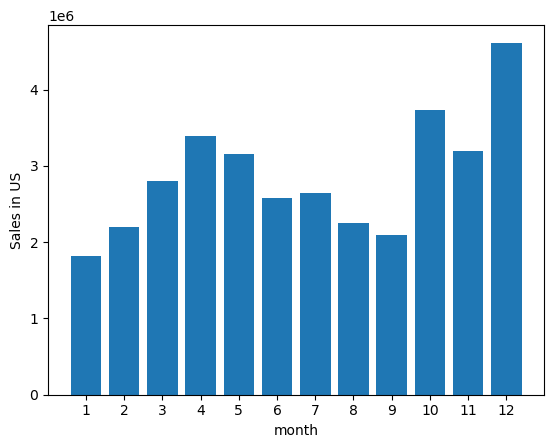

In [151]:
plt.bar(months, monthly_sales)
plt.xticks(months)
plt.xlabel("month")
plt.ylabel("Sales in US")


## Analysing maximum Orders by city


In [163]:
# Wich city has maximum orders
sales["city"]= [address.split(",")[1].strip() for address in sales["Purchase Address"]]
sales.city.unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [205]:
city_sales = sales.groupby("city")["city"].count()
#city_sales.reset_index(inplace= True)
city_sales

city
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: city, dtype: int64

<AxesSubplot:xlabel='city'>

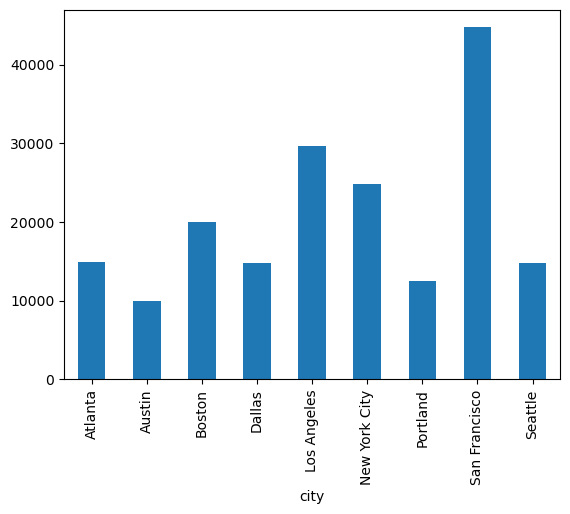

In [207]:
city_sales.plot.bar()

## Time in which sales of product purchase is maximum

In [315]:
# Exrtact hour from order date 
sales["hour"] = pd.to_datetime(sales["Order Date"]).dt.hour
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month,Sales_amount,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,4,11.99,Los Angeles,9


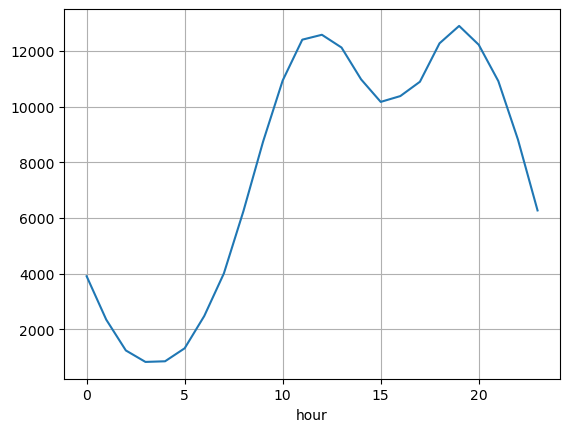

In [316]:
# plot to find busy hours
sales.groupby("hour")["hour"].count().plot()
plt.grid()

In [240]:
hour_sales = sales.groupby("hour")

keys = []
hours_df = [] 
for key, hour_df in hour_sales:
    keys.append(key)
    hours_df.append(len(hour_df)) 
    

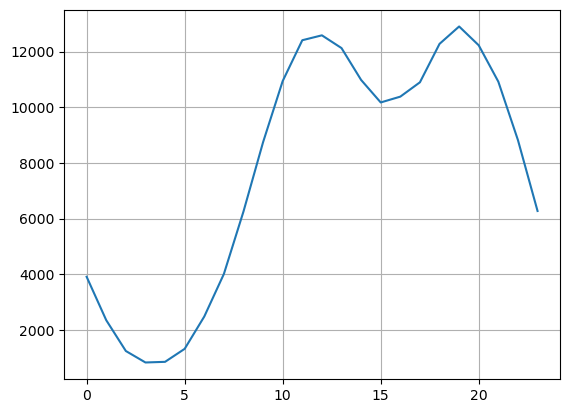

In [246]:
plt.plot(keys, hours_df )
plt.grid()

## Most sold products

<AxesSubplot:xlabel='Product'>

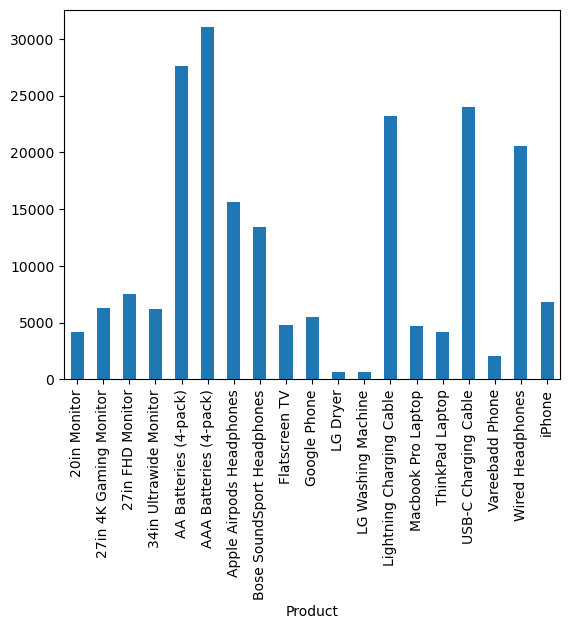

In [317]:
quantity = sales.groupby("Product")["Quantity Ordered"].sum()
products = sales.groupby("Product")["Quantity Ordered"].sum().index

quantity.plot(kind= "bar")

In [269]:
price = sales.groupby("Product")["Price Each"].mean()
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\bhupe\AppData\Local\Temp\ipykernel_7420\1148871656.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= "vertical", size = 10)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

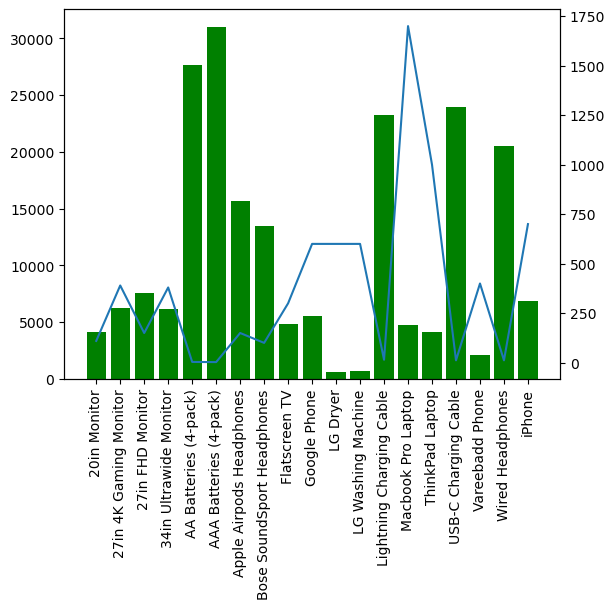

In [277]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color = "g")
ax2.plot(products, price)
ax1.set_xticklabels(products, rotation= "vertical", size = 10)


AttributeError: 'BarContainer' object has no attribute 'set_xticklabels'

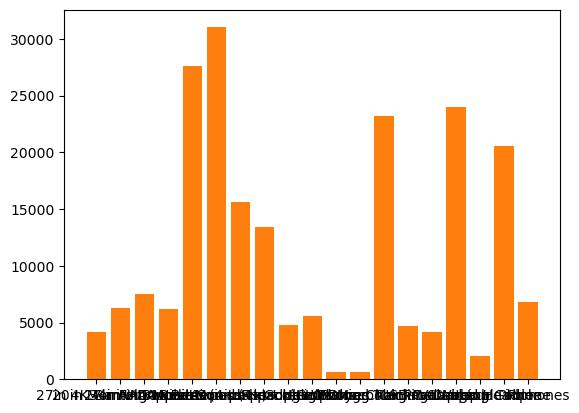

In [321]:
plt.bar(quantity_index, quantity)
plt.bar(quantity_index, quantity).set_xticklabels(quantity_index, rotation= "vertical", size= 8)

## Products that are sold together

In [282]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,month,Sales_amount,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:00,4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30:00,4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:00,4,11.99,Los Angeles,9


In [303]:
# Combine total products under each order 
combine_data= all_data[all_data.duplicated(subset= "Order ID", keep= False)]
combine_data["total_product"]= sales.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
combine_data.head()

C:\Users\bhupe\AppData\Local\Temp\ipykernel_7420\1537797766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_data["total_product"]= sales.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,total_product
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019-04-03,19:42:00,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019-04-03,19:42:00,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",2019-04-07,11:31:00,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [309]:
# Drop duplicates Order id after keeping first 
combine_data.drop_duplicates(subset= "Order ID", keep= "first", inplace= True )
combine_data.head()

C:\Users\bhupe\AppData\Local\Temp\ipykernel_7420\2781261297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_data.drop_duplicates(subset= "Order ID", keep= "first", inplace= True )


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date,time,total_product
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38:00,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019-04-03,19:42:00,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",2019-04-07,11:31:00,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",2019-04-10,17:00:00,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",2019-04-12,11:07:00,"Lightning Charging Cable,USB-C Charging Cable"


<AxesSubplot:ylabel='total_product'>

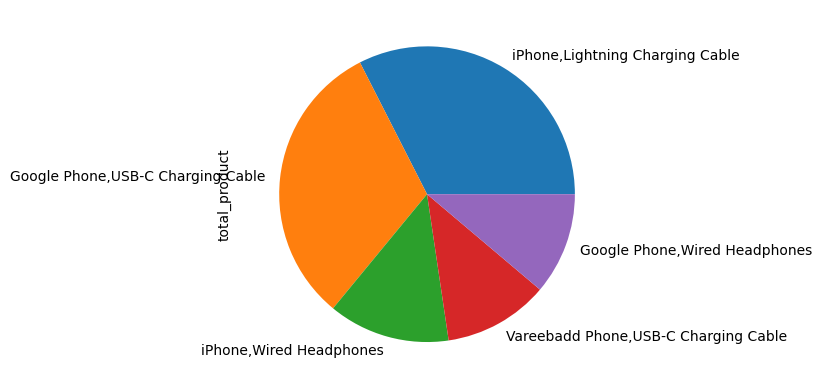

In [314]:
# find top 5 product combinatoion
combine_data["total_product"].value_counts()[0:5].plot.pie()